<a href="https://colab.research.google.com/github/nalymugwe/DataCquence/blob/main/Data_Cquence_Assignment_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.model_selection

c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, 
                cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, 
               s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, 
               alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, 
                     cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, 
                           colorscale=colorscale, cdiscrete=cdiscrete, 
                           psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax

In [8]:
!pwd

/content/gdrive/My Drive/Data Science/Data


In [9]:
#Mount Colab onto Google Drive for easier extraction of files
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
#First import the operating system and confirm the list of files.
import os
os.chdir('/content/gdrive/MyDrive/Data Science/Data')
!ls

 01_heights_weights_genders.csv
 ks-projects-201801.csv
'Measurement and analysis of Youtube Trending Videos.gdoc'
'Project ideas to tackle.gdoc'
 services_annual_dataset.zip
 YouTubedata_20210106_220013B.csv
 Youtubedata_20210109_213012A.csv
'YoutubeData.csv - Trending Videos.zip'
'YouTube Project Files.zip'


In [11]:
dflog = pd.read_csv('/content/gdrive/MyDrive/Data Science/Data/01_heights_weights_genders.csv')
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0.5, 1.0, 'Relationship between Weight and Height')

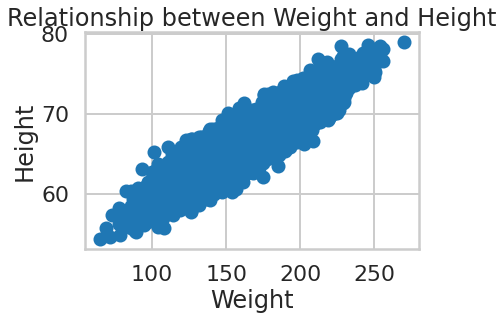

In [12]:
# Scatter plot of Weight vs Height
plt.scatter(dflog.Weight, dflog.Height)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Relationship between Weight and Height")

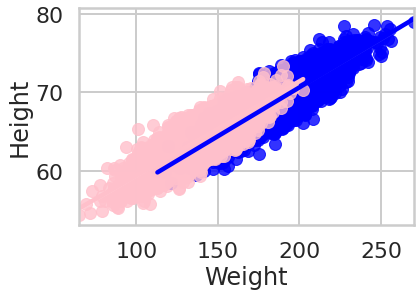

In [13]:
sns.regplot(x='Weight', y='Height', data=dflog[dflog['Gender']=='Male'], color='blue')
sns.regplot(x='Weight', y='Height', data=dflog[dflog['Gender']=='Female'], color='pink')

In [14]:
# Observation of scatter plot
# The weight and height of the females is lower than their male counterparts.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Height','Weight']].values, 
                                              (dflog.Gender == "Male").values,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))


0.9252


In [16]:
# Obersavation
# The accuracy is pretty good showing we have a good model for prediction

In [17]:
#Tuning the model

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [18]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

0.9172


In [19]:
Cs = [0.001, 0.1, 1, 10, 100]
from sklearn.model_selection import cross_val_score
for C in Cs:
    clf = LogisticRegression(C=C)
    print(C)
    print(sum(cross_val_score(clf, Xlr, ylr, cv=5, scoring='accuracy'))/5) 

0.001
0.9120000000000001
0.1
0.9166666666666666
1
0.9168
10
0.9168
100
0.9168


In [20]:
clf = LogisticRegression(C=0.001)
clf.fit(Xlr,ylr)
print(accuracy_score(clf.predict(Xtestlr),ytestlr))

0.9184


In [21]:
clf = LogisticRegression(C=0.1)
clf.fit(Xlr,ylr)
print(accuracy_score(clf.predict(Xtestlr),ytestlr))

0.9252


In [22]:
clf = LogisticRegression(C=1)
clf.fit(Xlr,ylr)
print(accuracy_score(clf.predict(Xtestlr),ytestlr))

0.9252


In [23]:
clf = LogisticRegression(C=10)
clf.fit(Xlr,ylr)
print(accuracy_score(clf.predict(Xtestlr),ytestlr))

0.9252


In [24]:
clf = LogisticRegression(C=100)
clf.fit(Xlr,ylr)
print(accuracy_score(clf.predict(Xtestlr),ytestlr))

0.9252


In [25]:
#Observation

#The best C value to use was either 0.1, 1, 10 or 100 as it has the same accuracy compared to 0.01 which a lower accuracy. The difference however in this accuracy is very low.

In [26]:
#Black box Grid Search in sklearn

from sklearn.model_selection import GridSearchCV
dict_Cs = {'C': [0.001, 0.1, 1, 10, 100]}
clf = GridSearchCV(LogisticRegression(), dict_Cs, 'accuracy', cv=5)


In [27]:
clf.fit(Xlr,ylr)
print(clf.best_params_)
print(clf.best_score_)

{'C': 1}
0.9168


In [28]:
print(accuracy_score(clf.predict(Xtestlr),ytestlr))

0.9252


In [29]:
# Observation
# This gives the same result as the C score meaning we can proceed with the prediction. It's important to do this excercise to confirm that the model we are using will give us accurate predictions.

In [30]:
# A walkthrough of the math behind logistic regression
# Print the best value of the parameters, and return the best classifier.

def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = sklearn.model_selection.GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best


In [31]:
# Fit the training set, retrain the entire training set and calculate the training and testing accuracy. Return the split data and the trained classifier.

from sklearn.model_selection import train_test_split

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

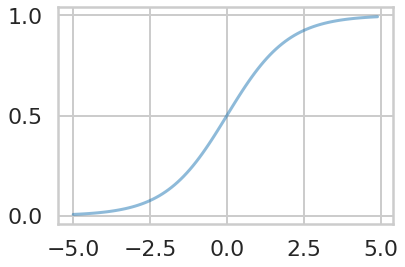

In [32]:
# Logistic regression

h = lambda z: 1. / (1 + np.exp(-z))
zs=np.arange(-5, 5, 0.1)
plt.plot(zs, h(zs), alpha=0.5);

In [33]:
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [34]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(), 
                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                           dflog, ['Weight', 'Height'], 'Gender','Male')

BEST PARAMS {'C': 0.01}
Accuracy on training data: 0.92
Accuracy on test data:     0.91


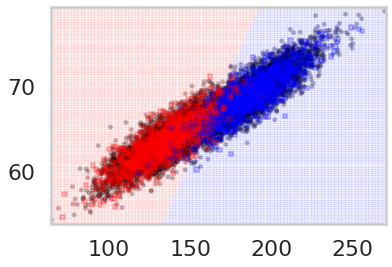

In [35]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, alpha=0.2);

In [36]:
# In the figure here showing the results of the logistic regression, we plot the actual labels of both the training(circles) and test(squares) samples. The 0's (females) are plotted in red, the 1's (males) in blue. We also show the classification boundary, a line (to the resolution of a grid square). Every sample on the red background side of the line will be classified female, and every sample on the blue side, male. Notice that most of the samples are classified well, but there are misclassified people on both sides, as evidenced by leakage of dots or squares of one color onto the side of the other color. Both test and training accuracy are about 92%.

In [37]:
# Maximizing the probability of the training set.

# it is a principled way of obtaining the highest probability classification. This process is called maximum likelihood estimation since we are maximising the likelihood of the training data y
clf_l.predict_proba(Xtest_l)

array([[0.01388852, 0.98611148],
       [0.99291725, 0.00708275],
       [0.00437222, 0.99562778],
       ...,
       [0.01094019, 0.98905981],
       [0.60690811, 0.39309189],
       [0.99835898, 0.00164102]])